## Ridge and LAsso Regression implementation

# Linear Regression for _ Per capita income prediction

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [47]:
df=pd.read_csv('per capita income.csv')

In [48]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


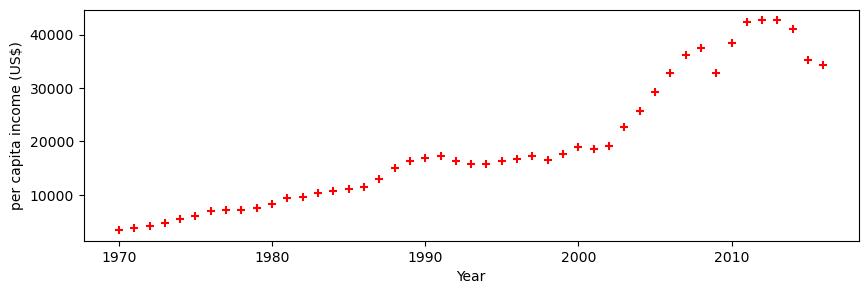

In [68]:
%matplotlib inline 
plt.figure(figsize=(10,3))
plt.xlabel('Year')
plt.ylabel('per capita income (US$)')

plt.scatter(df.year, df['per capita income (US$)'], color='red',marker='+')


In [75]:
lin_regr=LinearRegression()
X = df['year'].values.reshape(-1, 1)# reshape
lin_regr.fit(X, df['per capita income (US$)'])

LinearRegression()

In [102]:
lin_regr.predict([[2005]]) #Price prediction for 3300 sq ft

array([28861.71796608])

In [93]:
lin_regr.coef_

array([828.46507522])

In [94]:
lin_regr.intercept_

-1632210.7578554575

y=m*x+c

In [99]:
828.46507522*2005+(-1632210.7578554575)

# Here we can check the value 28861 matches with the prediction value which comes through y = mx +b formula

28861.71796064265

In [109]:
year_toget=pd.read_csv('year.csv')

In [127]:
prediction=lin_regr.predict(year_toget)

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [113]:
year_toget['Per Capita Income']=pre

In [116]:
year_toget.head(5)

,year,Per Capita Income
0,1970,-134.559667
1,1971,693.905409
2,1972,1522.370484
3,1973,2350.835559
4,1974,3179.300634


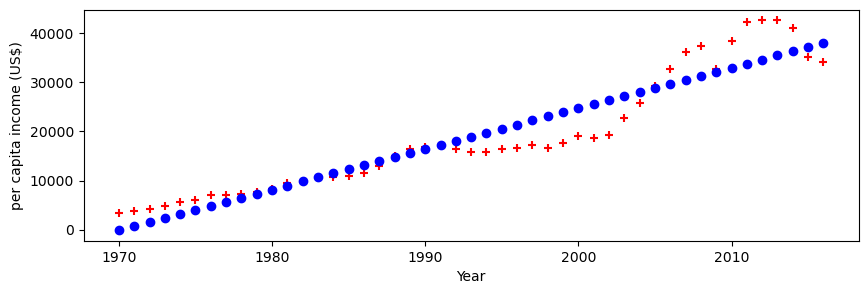

In [126]:
%matplotlib inline 
plt.figure(figsize=(10,3))
plt.xlabel('Year')
plt.ylabel('per capita income (US$)')

plt.scatter(df.year, df['per capita income (US$)'], color='red',marker='+')
plt.scatter(df.year,pre,color='blue') #pre = lin_regr.predict(year_toget)

#### lasso & ridge

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_diabetes

In [9]:
df=load_diabetes()

In [10]:
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [11]:
dataset = pd.DataFrame(df.data)
print(dataset.head())

          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [12]:
dataset=pd.DataFrame(df.data,columns=df.feature_names)
dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [13]:
dataset.columns=df.feature_names

In [14]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
dataset['Price']=df.target

In [16]:
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Price
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
x=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

In [18]:
#Independent features
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [19]:
#Dependent Features
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: Price, dtype: float64

## Redige regression (1st linear)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lin_regressor=LinearRegression()

In [24]:
from sklearn.model_selection import cross_val_score

In [26]:
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)

In [27]:
mse

array([-2779.92344921, -3028.83633883, -3237.6875877 , -3008.74648884,
       -2910.21268776])

In [29]:
mean_mse=np.mean(mse)
mean_mse

-2993.0813104693307

OR

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5) #neg_mean_squ_error is same as mean sq error(MSE)
mean_mse=np.mean(mse)
print(mean_mse)

-2993.0813104693307


## Ridge Regression (2nd reduce the error)

In [1]:
from sklearn.linear_model import Ridge

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
ridge=Ridge()

In [4]:
parameters={'alpha':[1e-15,1e-3,1e-2,1e-2,1,5,10,20,30,40,50]}

In [25]:
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(x,y)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 0.01, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [26]:
ridge_regressor.best_params_

{'alpha': 0.001}

In [27]:
ridge_regressor.best_score_

-2993.0661546538695

In [146]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

ValueError: Found input variables with inconsistent numbers of samples: [47, 442]

In [23]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.871945115432595


## Lasso Regression

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(x,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.122e+05, tolerance: 2.153e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.004e+05, tolerance: 2.044e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

{'alpha': 1e-08}
-2993.0813092745934


C:\Users\APL73176-NITESHKUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.642e+03, tolerance: 2.621e+02
  model = cd_fast.enet_coordinate_descent(


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [31]:
prediction_lasso=lasso_regressor.predict(x_test)
prediction_ridge=ridge_regressor.predict(x_test)

C:\Users\APL73176-NITESHKUMAR\AppData\Local\Temp\ipykernel_25968\1196053527.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Price', ylabel='Density'>

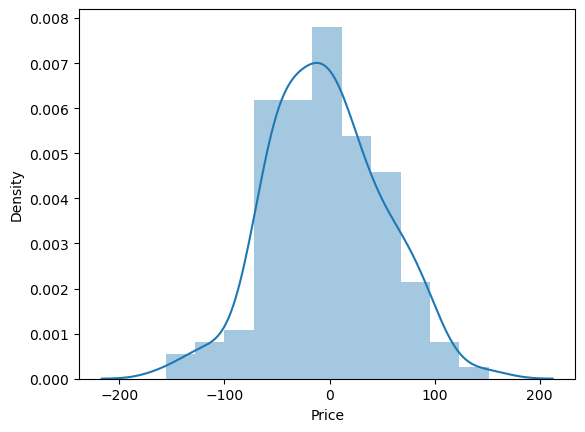

In [32]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

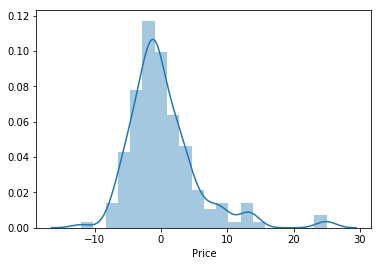

In [29]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)